In [73]:
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

**[how to scrape large amounts of data](https://medium.com/swlh/how-to-scrape-large-amounts-of-reddit-data-using-pushshift-1d33bde9286#:~:text=Under%20the%20hood%2C%20pmaw%20makes,of%2060%20requests%20per%20minute.)**

In [2]:
# pip install pmaw

The pmaw package will allow us to get more data from reddit using the PushShift API, as it has a limit of 100 request

# Getting Data From the API

In [3]:
from pmaw import PushshiftAPI
import datetime as dt

In [4]:
before = int(dt.datetime(2022,4,1,0,0).timestamp())
after = int(dt.datetime(2021,12,1,0,0).timestamp())

In [5]:
api = PushshiftAPI()

# subreddit url endpoints
sub1 = 'movies'
sub2 = 'boxoffice'

# size of data received
size = 5000

# getting data

reddit1_comments = api.search_comments(subreddit=sub1, limit=size, before=before, after=after)
reddit2_comments = api.search_comments(subreddit=sub2, limit=size, before=before, after=after)


In [7]:
reddit1_subs = api.search_submissions(subreddit=sub1, limit=size, before=before, after=after)
reddit2_subs = api.search_submissions(subreddit=sub2, limit=size, before=before, after=after)

In [8]:
len(reddit1_comments.responses), len(reddit2_comments.responses)

(5000, 5000)

In [9]:
len(reddit1_subs.responses), len(reddit2_subs.responses)

(5000, 5000)

In [10]:
reddit1_comments.responses[:1]

[{'all_awardings': [],
  'archived': False,
  'associated_award': None,
  'author': 'ToyVaren',
  'author_flair_background_color': None,
  'author_flair_css_class': None,
  'author_flair_richtext': [],
  'author_flair_template_id': None,
  'author_flair_text': None,
  'author_flair_text_color': None,
  'author_flair_type': 'text',
  'author_fullname': 't2_nmp0hv0',
  'author_patreon_flair': False,
  'author_premium': False,
  'body': "Imho, look around the main concourse in a mall, there's plenty of room to put multiple cameras. \n\nI just saw a couple of movies in an abandoned fort and factory, they had to use weird angles and some scenes were very cramped, like the camera was too close.\n\nThis is probably also why that one abandoned bank is the bank on every big budget film, its built like a stadium.",
  'body_sha1': 'fec840bf1361e06886f02e4d4f9ea1e7bbf821f2',
  'can_gild': True,
  'collapsed': False,
  'collapsed_because_crowd_control': None,
  'collapsed_reason': None,
  'collapse

# Rearranging the Data

In [11]:
# creating a list of posts for subreddit1 and subreddit2 comments
reddit1_coms = []
reddit2_coms = []

for i in reddit1_comments.responses:
    reddit1_coms.append(i['body'])

for i in reddit2_comments.responses:
    reddit2_coms.append(i['body'])    


In [103]:
reddit1_coms[50]

'I love that movie. One of my favorite horrors, and I would say It’s the second best zombie movie ever made. Only zombie movie that beats out The Godfather of the genre in my opinion is Train to Busan (2016).'

In [105]:
reddit2_coms[190]

'Oh man you gotta watch The Wizard of Oz at least'

In [14]:
reddit1_subs.responses[:1]

[{'all_awardings': [],
  'allow_live_comments': False,
  'author': 'RippingLegos',
  'author_flair_css_class': None,
  'author_flair_richtext': [],
  'author_flair_text': None,
  'author_flair_type': 'text',
  'author_fullname': 't2_1sosf7t2',
  'author_is_blocked': False,
  'author_patreon_flair': False,
  'author_premium': False,
  'awarders': [],
  'can_mod_post': False,
  'contest_mode': False,
  'created_utc': 1642455305,
  'domain': 'i.redd.it',
  'full_link': 'https://www.reddit.com/r/movies/comments/s6fkxt/latest_shot_from_the_filming_of_godzilla/',
  'gildings': {},
  'id': 's6fkxt',
  'is_created_from_ads_ui': False,
  'is_crosspostable': False,
  'is_meta': False,
  'is_original_content': False,
  'is_reddit_media_domain': True,
  'is_robot_indexable': False,
  'is_self': False,
  'is_video': False,
  'link_flair_background_color': '',
  'link_flair_richtext': [],
  'link_flair_text_color': 'dark',
  'link_flair_type': 'text',
  'locked': False,
  'media_only': False,
  'no_

In [18]:
# creating a list of posts/submissions for subreddit1 and subreddit2
reddit1_s = []
reddit2_s = []

for i in reddit1_subs.responses:
    reddit1_s.append(i['title'])

for i in reddit2_subs.responses:
    reddit2_s.append(i['title'])    


In [19]:
reddit1_coms[:2]

["Imho, look around the main concourse in a mall, there's plenty of room to put multiple cameras. \n\nI just saw a couple of movies in an abandoned fort and factory, they had to use weird angles and some scenes were very cramped, like the camera was too close.\n\nThis is probably also why that one abandoned bank is the bank on every big budget film, its built like a stadium.",
 "Bro what's a movie?"]

In [20]:
reddit1_s[6]

'Best Horror Movie?'

In [23]:
len(reddit1_coms), len(reddit1_s), len(reddit2_coms), len(reddit2_s)

(5000, 5000, 5000, 5000)

In [24]:
# append the respective reddit posts with their comments
reddit1_coms.extend(reddit1_s)


In [25]:
# create dataframe for reddit1 posts and comments
df1 = pd.DataFrame({'post': reddit1_coms, 'class': 0})   # movies == 0

In [26]:
df1.head()

,post,class
0,"Imho, look around the main concourse in a mall...",0
1,Bro what's a movie?,0
2,You probably enjoy the smell of your own farts...,0
3,"Yep, looks like Cillian Murphy?",0
4,You’re so brave,0


In [27]:
# append the respective reddit posts with their comments
reddit2_coms.extend(reddit2_s)


In [28]:
# create dataframe for reddit1 posts and comments
df2 = pd.DataFrame({'post': reddit2_coms, 'class': 1})   # boxoffice == 1

In [29]:
df2['post'][15]

'Can you explain why without spoilers?'

In [30]:
df2.head()

,post,class
0,Dune had day and date on HBOmax. Any person a...,1
1,There’s enough if you go from now until June: ...,1
2,It's an anxiety thing. Can easily go 5 or 6 ho...,1
3,2023 even if by default,1
4,It would need to go above the average multipli...,1


In [31]:
len(df1), len(df2)

(10000, 10000)

# Combining Data

In [32]:
# concatenate the two dataframes
posts_df = pd.concat([df1, df2])

In [33]:
# shuffle the rows since the classes are grouped together
posts_df = posts_df.sample(frac=1, ignore_index=True)

In [34]:
posts_df  # movies == 0, boxoffice == 1

,post,class
0,Billy Butcherson Is Back in ‘Hocus Pocus 2’ an...,0
1,Here we go again,1
2,What will The Lost City open to domestically?,1
3,Who’s thirsty? Go watch the video 😈,0
4,"I wanted to see this in Imax or Dolby Digital,...",0
...,...,...
19995,Which DC Film will be the next to cross $100M ...,1
19996,First Image of Cillian Murphy as J. Robert Opp...,0
19997,"By ""stunt"", I mean a stunt pulled off by the a...",1
19998,Maybe that's their play.,1


In [35]:
# removing duplicate posts/comments
posts_df.drop_duplicates(inplace=True)

In [36]:
len(posts_df)

19187

In [55]:
# preprocess a text string
def preprocess_text(text):
    # Instantiate lemmatizer
    lemma = WordNetLemmatizer()
    # Expanded stop words
    stop = stopwords.words('english')
    stop.extend(['im','ive','got', 'wa', 'ha'])
    # Remove punctuation and lower case words
    words_list = re.sub(r'[^a-zA-Z ]','',text.lower()).split()
    words_list = [lemma.lemmatize(i) for i in words_list]
    words_list = [i for i in words_list if i not in stop]
    return ' '.join(words_list)


In [56]:
posts_df['post'] = posts_df['post'].apply(lambda x: preprocess_text(x))

In [57]:
posts_df.isnull().sum()

post     0
class    0
dtype: int64

In [58]:
posts_df

,post,class
0,billy butcherson back hocus pocus doug jones s...,0
1,go,1
2,lost city open domestically,1
3,thirsty go watch video,0
4,wanted see imax dolby digital theyre showing s...,0
...,...,...
19995,dc film next cross domestically opening weekend,1
19996,first image cillian murphy j robert oppenheime...,0
19997,stunt mean stunt pulled actor sense owni know ...,1
19998,maybe thats play,1


In [59]:
# save dataframe
posts_df.to_csv('./data/posts.csv', index=False)

# EDA

In [61]:
X = posts_df['post']
y = posts_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Find out the most Common Words

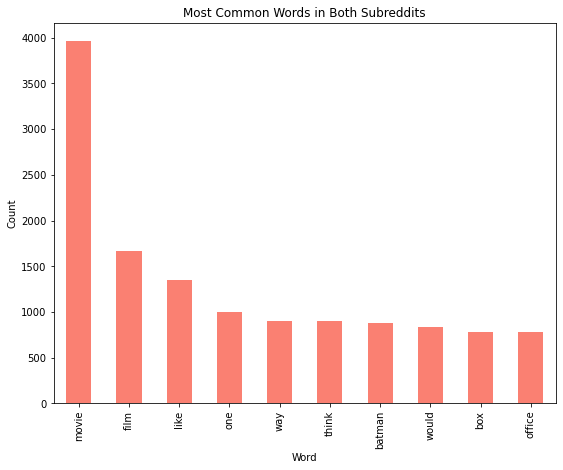

In [107]:
cvec = CountVectorizer()
x = cvec.fit_transform(X_train)
cvec_df = pd.DataFrame(x.todense(), 
                          columns=cvec.get_feature_names_out())
plt.figure(figsize=(9,7))
cvec_df.sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color='salmon')
plt.title('Most Common Words in Both Subreddits')
plt.xlabel('Word')
plt.ylabel('Count');

In [68]:
# separating the classes to get the most common words for each class
df1 = posts_df[posts_df['class'] == 0]
df2 = posts_df[posts_df['class'] == 1]

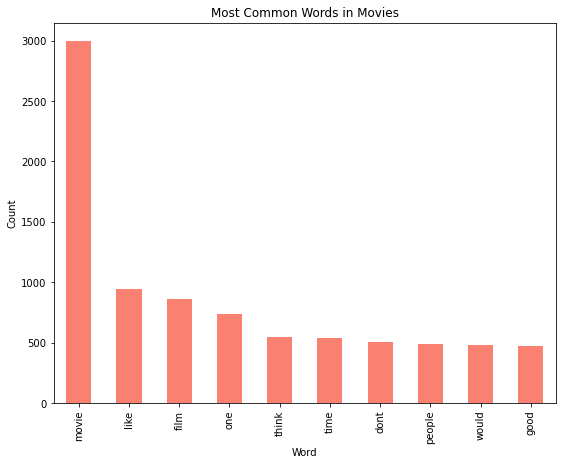

In [108]:
cvec = CountVectorizer()
x = cvec.fit_transform(df1['post'])
cvec_df = pd.DataFrame(x.todense(), 
                          columns=cvec.get_feature_names_out())
plt.figure(figsize=(9,7))
cvec_df.sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color='salmon')
plt.title('Most Common Words in Movies')
plt.xlabel('Word')
plt.ylabel('Count');

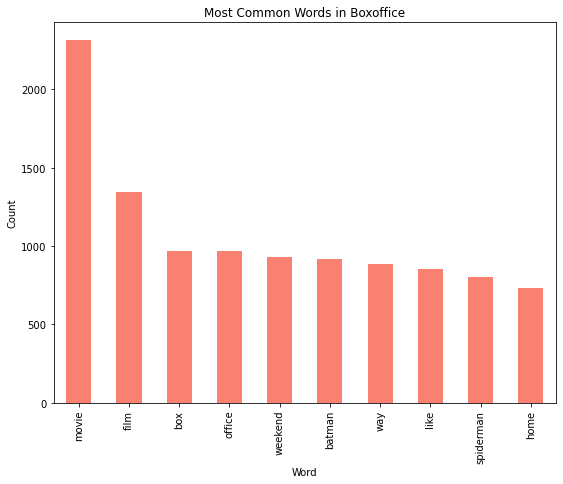

In [109]:
cvec = CountVectorizer()
x = cvec.fit_transform(df2['post'])
cvec_df = pd.DataFrame(x.todense(), 
                          columns=cvec.get_feature_names_out())
plt.figure(figsize=(9,7))
cvec_df.sum().sort_values(ascending = False).head(10).plot(kind = 'bar',color='salmon')
plt.title('Most Common Words in Boxoffice')
plt.xlabel('Word')
plt.ylabel('Count');

### Word Count per Subreddit

In [75]:
# splitting the posts and finding out the length to get the word count
posts_df['word_count'] = posts_df['post'].apply(lambda x : len(x.split()))

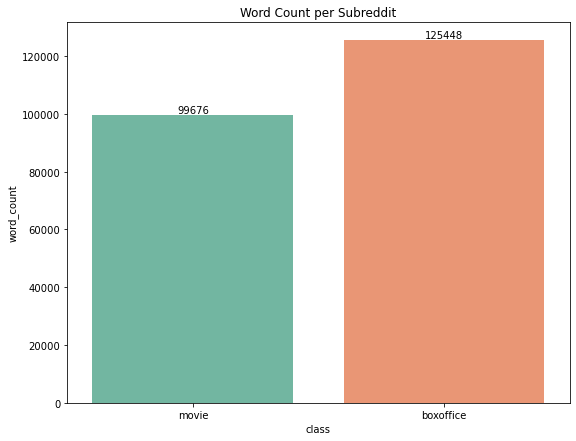

In [76]:
fig, ax = plt.subplots(figsize=(9,7))
ax = sns.barplot(x=posts_df['class'], y=posts_df.groupby('class').sum()['word_count'], palette='Set2')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(['movie', 'boxoffice'])
ax.set_title('Word Count per Subreddit');

# https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values